# Basic Plots, Groupping and Multi-Level Tables

Inspiration and some of the parts came from: Python Data Science [GitHub repository](https://github.com/jakevdp/PythonDataScienceHandbook/tree/master), [MIT License](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/LICENSE-CODE) and [Introduction to Pandas](https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb) by Google, [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0)

needed packages:
 * pandas
 * numpy

support package
 * seaborn (load dataset titanic from seaborn package)
 * pivottablejs (for more easy pivot tables and fast simple visualization)
 * watermark (documenting version of packages)

In [13]:
#!pip install pandas
#!pip install numpy
#!pip install seaborn
!pip install watermark
!pip install pivottablejs

## Intro to pandas


[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Learning Objectives:

 * Gain an introduction to the *DataFrame* and *Series* data structures of the pandas library

 * Import CSV data into a pandas *DataFrame*

 * Access and manipulate data within a *DataFrame* and *Series*

 * Export *DataFrame* to CSV
---
 * operations
  * selection
  * filtering
  * concat
  * NaNs
---
 * descriptive statistics/EDA
 * corr matrix
---
 * Simple plotting from *DataFrame*

 * Pivot tables

# Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [2]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.5.3'

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [3]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.head()
#california_housing_dataframe.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Simple Plotting

The example below is using `DataFrame.describe` to show interesting statistics about a `DataFrame`.

In [4]:
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

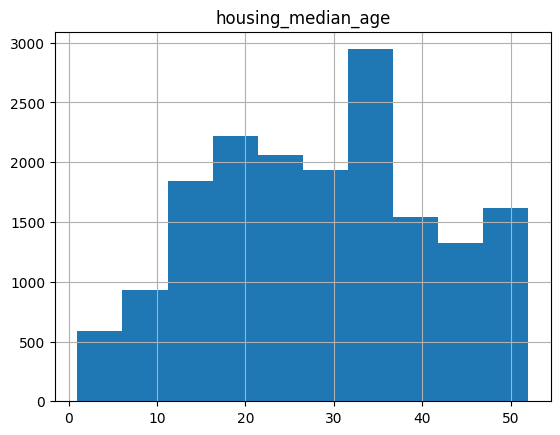

In [5]:
california_housing_dataframe.hist('housing_median_age')

Another example, `DataFrame.plot.scatter` lets you quickly study the possition of houses:

<Axes: xlabel='longitude', ylabel='latitude'>

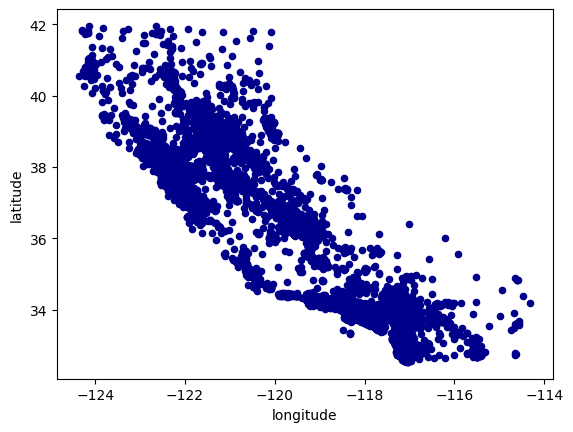

In [6]:
california_housing_dataframe.plot.scatter(x='longitude',
                      y='latitude',
                      c='DarkBlue')

You can learn more in Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

<Axes: >

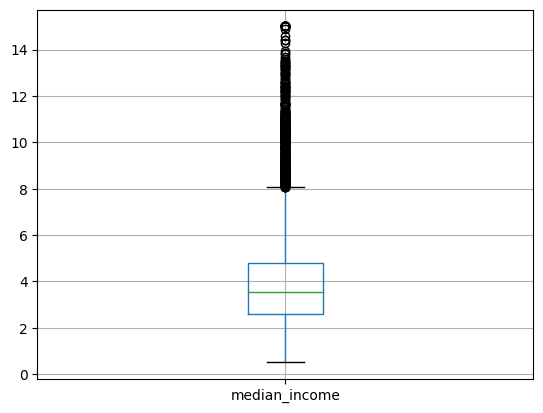

In [7]:
california_housing_dataframe.boxplot(column=["median_income"])

## Pivot Tables

In [8]:
import seaborn as sns

# load dataset titanic from seaborn package
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand

To start learning more about this data, we might begin by grouping according to sex, survival status, or some combination thereof.
If you read the previous chapter, you might be tempted to apply a `groupby` operation—for example, let's look at survival rate by sex:

In [9]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


This gives us some initial insight: overall, three of every four females on board survived, while only one in five males survived!

This is useful, but we might like to go one step deeper and look at survival rates by both sex and, say, class.
Using the vocabulary of `groupby`, we might proceed using a process like this:
we first *group by* class and sex, then *select* survival, *apply* a mean aggregate, *combine* the resulting groups, and finally *unstack* the hierarchical index to reveal the hidden multidimensionality. In code:

In [10]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This gives us a better idea of how both sex and class affected survival, but the code is starting to look a bit garbled.
While each step of this pipeline makes sense in light of the tools we've previously discussed, the long string of code is not particularly easy to read or use.
This two-dimensional `groupby` is common enough that Pandas includes a convenience routine, `pivot_table`, which succinctly handles this type of multidimensional aggregation.

### Pivot Table Syntax

Here is the equivalent to the preceding operation using the `DataFrame.pivot_table` method:

In [11]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This is eminently more readable than the manual `groupby` approach, and produces the same result.
As you might expect of an early 20th-century transatlantic cruise, the survival gradient favors both higher classes and people recorded as females in the
data. First-class females survived with near certainty (hi, Rose!), while only one in eight or so third-class males survived (sorry, Jack!).

## Pivot Table Widgets

Some of the widgets needs to be specificaly tweaked for Google Colab or Jupyter Notebooks

In [14]:
from pivottablejs import pivot_ui
from IPython.display import HTML
from IPython.display import IFrame
import json, io

# Google colab alternative template

TEMPLATE = u"""
<!DOCTYPE html>
<html>
    <head>
        <meta charset="UTF-8">
        <title>PivotTable.js</title>

        <!-- external libs from cdnjs -->
        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/c3/0.4.11/c3.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery/1.11.2/jquery.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jqueryui/1.11.4/jquery-ui.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/jquery-csv/0.71/jquery.csv-0.71.min.js"></script>


        <link rel="stylesheet" type="text/css" href="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.css">
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/pivot.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/d3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/c3_renderers.min.js"></script>
        <script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/pivottable/2.19.0/export_renderers.min.js"></script>

        <style>
            body {font-family: Verdana;}
            .node {
              border: solid 1px white;
              font: 10px sans-serif;
              line-height: 12px;
              overflow: hidden;
              position: absolute;
              text-indent: 2px;
            }
            .c3-line, .c3-focused {stroke-width: 3px !important;}
            .c3-bar {stroke: white !important; stroke-width: 1;}
            .c3 text { font-size: 12px; color: grey;}
            .tick line {stroke: white;}
            .c3-axis path {stroke: grey;}
            .c3-circle { opacity: 1 !important; }
            .c3-xgrid-focus {visibility: hidden !important;}
        </style>
    </head>
    <body>
        <script type="text/javascript">
            $(function(){

                $("#output").pivotUI(
                    $.csv.toArrays($("#output").text())
                    , $.extend({
                        renderers: $.extend(
                            $.pivotUtilities.renderers,
                            $.pivotUtilities.c3_renderers,
                            $.pivotUtilities.d3_renderers,
                            $.pivotUtilities.export_renderers
                            ),
                        hiddenAttributes: [""]
                    }
                    , {
                        onRefresh: function(config) {
                            var config_copy = JSON.parse(JSON.stringify(config));
                            //delete some values which are functions
                            delete config_copy["aggregators"];
                            delete config_copy["renderers"];
                            //delete some bulky default values
                            delete config_copy["rendererOptions"];
                            delete config_copy["localeStrings"];
                            $("#output2").text(JSON.stringify(config_copy, undefined, 2));
                        }
                    }
                    , %(kwargs)s
                    , %(json_kwargs)s)
                ).show();
             });
        </script>
        <div id="output" style="display: none;">%(csv)s</div>

        <textarea id="output2"
        style="float: left; width: 0px; height: 0px; margin: 0px; opacity:0;" readonly>
        </textarea>

        <button onclick="copyTextFunction()">Copy settings</button>
        <script>
        function copyTextFunction() {
                    var copyText = document.getElementById("output2");
                    copyText.select();
                    document.execCommand("copy");
                    }
        </script>

    </body>
</html>
"""


def pivot_cht_html(df, outfile_path = "pivottablejs.html", url="",
    width="100%", height="500",json_kwargs='',  **kwargs):
  with io.open(outfile_path, 'wt', encoding='utf8') as outfile:
      csv = df.to_csv(encoding='utf8')
      if hasattr(csv, 'decode'):
          csv = csv.decode('utf8')
      outfile.write(TEMPLATE %
            dict(csv=csv, kwargs=json.dumps(kwargs),json_kwargs=json_kwargs))

  IFrame(src=url or outfile_path, width=width, height=height)
  return HTML(outfile_path)

Calling the function 'pivot_ui' with Pandas DataFrame as input will allow you interactively explore and plot its values

In [15]:
pivot_ui(titanic)
HTML('pivottablejs.html')

**Watermark**

In [16]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,seaborn,pivottablejs"))

Last updated: 2023-08-15T07:18:44.450998+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.109+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

watermark   : 2.4.3
numpy       : 1.23.5
pandas      : 1.5.3
seaborn     : 0.12.2
pivottablejs: 0.9.0

